<a href="https://colab.research.google.com/github/choihyugjun/stock_market_analysis/blob/main/pandas_exercise_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import pandas as pd

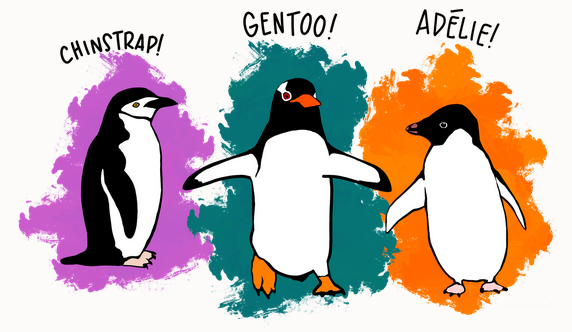

# 데이터 전처리 연습

- 이 파일에서는 지금까지 배운 전처리 방법을 모두 적용하는 연습을 합니다.

- 데이터 파일은 3종의 펭귄에 대한 데이터로 전형적인 분류문제에 해당하는 데이터 입니다.

- 다음을 실행하면 펭귄 데이터 셋을 `DataFrame`으로 읽을 수 있습니다.




In [ ]:
df = sns.load_dataset('penguins')

In [ ]:
df.head()

- 각 필드는 다음처럼 구성되어 있고 `bill_length`와 `bill_depth`의 의미는 그림에 나타내었습니다.
    - **species**: penguin species (Chinstrap, Adélie, or Gentoo)
    - **island**: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
    - **bill_length_mm**: culmen length (mm)
    - **bill_depth_mm**: culmen depth (mm)
    - **flipper_length_mm**: flipper length (mm)
    - **body_mass_g**: body mass (g)
    - **sex**: penguin sex

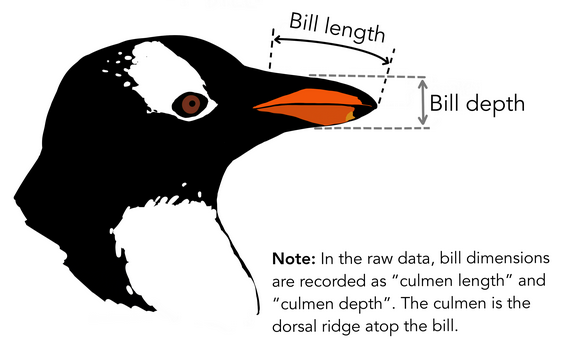

###  **[연습 1]**

- 데이터의 정보를 살펴보기 위해 `info()`로 확인하세요.

In [ ]:
# 여기 코드를 작성하세요.
df.info() # None를 적당히 수정하세요.

- 특정 컬럼에 어떤 값들이 얼마나 있는지 `value_counts()`를 실행해서 직접 확인할 수 있습니다.

- 다음 셀을 실행해서 종의 분포가 어떻게 되는지 확인하세요.

In [ ]:
df['species']

In [ ]:
df['species'].value_counts()

- 위처럼 분포되어있는 펭권의 종류를 맞추는 문제를 풀기로 하고 데이터 전처리 작업을 시작하겠습니다.

###  **[연습 2]**

- 빈값이 있다면 컬럼별 빈값의 개수를 출력하세요.

In [ ]:
df.isnull().sum()  # None를 적당히 수정하세요.

###  **[연습 3]** :  컬럼 선별

- 이번 연습에서는 펭귄의 신체사이즈, 서식지, 성별 정보로 펭귄의 종species을 맞추는 문제를 가정하므로 그에 맞도록 다음 컬럼 변수에 맞는 컬럼을 초기화 하겠습니다.

In [ ]:
NUMERIC_COLS = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
CATEGORY_COLS = ['island', 'sex']
LABEL = "species"

###  **[연습 4]** :  데이터 분리

- 데이터를 전처리하는 것은 결국 데이터를 머신러닝 모델이 입력하기 위함입니다.

- 입력한 데이터로 모델을 학습하고 그 모델의 성능을 평가하기 위해 또 다른 데이터 셋을 사용합니다.

- 데이터 전처리 과정에서 데이터의 통계적 정보를 활용하는 경우가 생기는데 이렇게 데이터로 부터 획득되는 정보를 오로지 학습때 사용하는 데이터로 부터 획득된 것을 사용해야 합니다.

- 만약 테스트에 사용할 데이터의 정보가 이런 대표값에 스며들게 된다면 그 데이터로 모델을 온전히 테스트할 수 없게 됩니다.

- 따라서 전처리를 하기전에 반드시 데이터를 적어도 두 부분으로 나누는 것이 선행되어야 합니다.

- 다음 셀을 완성하여 데이터를 두 덩어리로 나누세요.

In [ ]:
# 필요한 함수 train_test_split를 임포트 하세요.
from sklearn.model_selection import train_test_split

In [ ]:
df

In [ ]:
# 데이터를 두부분으로 나눕니다. 이때 테스트 데이터의 크기는 20%로 지정하세요.
D_train, D_test = train_test_split(df, test_size=0.2, random_state=42)

# 분리된 데이터의 인덱스를 0부터 순차적으로 다시 세팅합니다.
D_train = D_train.reset_index(drop=True)
D_test = D_test.reset_index(drop=True)

# 데이터의 크기를 확인합니다.
D_train.shape, D_test.shape

In [ ]:
D_train['sex'].value_counts()

In [ ]:
D_test['sex'].value_counts()

- 분리된 데이터를 직접 확인해보겠습니다.

In [ ]:
D_train

In [ ]:
D_test

###  **[연습 5]** :  타겟 분리

- `D_train`으로 부터 타겟을 분리하여 `X_train`, `y_train`을 만드세요.

In [ ]:
# 타겟 분리
y_train = D_train[LABEL].copy()  # None를 적절한 컬럼명으로 수정하세요.
X_train = D_train.drop(LABEL, axis=1).copy() # None를 적절히 수정하세요.

###  **[연습 6]** :  빈값 채우기

- `pandas`의 `fillna`를 사용해서 빈값을 채우도록 하겠습니다.

- `X_train`에 대해서 수치형 변수는 중간값으로, 범주형 변수는 `MISSING`으로 채우세요.

In [ ]:
CAT_FILL_VALUE = 'MISSING'

X_train[CATEGORY_COLS] = X_train[CATEGORY_COLS].fillna(CAT_FILL_VALUE) # None를 적절히 수정하세요.

In [ ]:
X_train[NUMERIC_COLS].median()

In [ ]:
NUM_FILL_VALUE = X_train[NUMERIC_COLS].median() # None를 적절히 수정하세요. 마지막 None도 바꿔야 합니다. 주의하세요.

X_train[NUMERIC_COLS] = X_train[NUMERIC_COLS].fillna(NUM_FILL_VALUE) # None를 적절히 수정하세요.

- 채운 결과를 확인하세요. 모든 컬럼에 빈값이 0으로 나와야 합니다.

In [ ]:
X_train.isnull().sum() # None를 적절히 수정하세요.

###  **[연습 7]** :  범주형 변수 인코딩

- 범주형 변수 인코딩도 `pandas`의 `get_dummies()`를 사용합니다.

In [ ]:
X_train_enc = pd.get_dummies(X_train, columns=CATEGORY_COLS) # None를 적절히 수정하세요.
X_train_enc

###  **[연습 8]** :  수치형 변수 스케일링

- 수치형 변수를 모두 0~1 사이로 스케일링 합니다.

- `sklearn`의 `MinMaxScaler()`를 사용합니다. 아래 셀의 `None` 부분을 적당히 수정하세요.

- 세번째 셀은 완성되어 있으니 실행해서 제대로 스케일링 되는지 확인하세요.

In [ ]:
# 필요한 클래스를 임포트 하세요.
from sklearn.preprocessing import MinMaxScaler # None를 적절히 수정하세요.

In [ ]:
#  스케일링 객체를 생성합니다.
scaler = MinMaxScaler() # None를 적절히 수정하세요.

In [ ]:
X_train_scaled = pd.DataFrame(
    # 스케일링 객체를 fit하는 동시에 transform하세요.
    scaler.fit_transform(X_train_enc),
    # 스케일링된 결과는 numpy 어레이기 때문에 X_train_num_imputed의 컬럼을 전달합니다.
    columns=X_train_enc.columns,
    index=X_train_enc.index
)

X_train_scaled

###  **[연습 9]** :  테스트 세트 처리

- 지금까지 다음과 같은 순서로 데이터를 전처리 했습니다.
    - 타겟 분리
    - 빈값 채우기
    - 범주형 변수 인코딩
    - 수치형 변수 스케일링

- [연습 4]에서 분리해둔 테스트 세트도 모델에 입력되기 위해 전처리 되어야 하는데 학습 세트와 완전히 동일한 과정을 적용해야 합니다.

- 아래 5개 셀에 지금까지 코딩한 코드를 복사하고 적당히 테스트 세트에 적용되도록 수정하세요.

In [ ]:
D_test

In [ ]:
# 타겟 분리
y_test = D_test[LABEL].copy()
X_test = D_test.drop(LABEL, axis=1).copy()

In [ ]:
# 빈값 채우기
X_test[CATEGORY_COLS] = X_test[CATEGORY_COLS].fillna(CAT_FILL_VALUE)
X_test[NUMERIC_COLS] = X_test[NUMERIC_COLS].fillna(NUM_FILL_VALUE)

In [ ]:
# 빈값을 확인합니다.
X_test.isnull().sum()

In [ ]:
# 범주형 변수 인코딩(원핫 인코딩)
X_test_enc = pd.get_dummies(X_test, columns=CATEGORY_COLS)
X_test_enc

In [ ]:
# 수치형 변수 스케일링
X_test_scaled = pd.DataFrame(
    # 스케일링 객체를 fit하는 동시에 transform하세요.
    scaler.transform(X_test_enc),
    # 스케일링된 결과는 numpy 어레이기 때문에 X_train_num_imputed의 컬럼을 전달합니다.
    columns=X_test_enc.columns,
    index=X_test_enc.index
)

X_test_scaled

### 마무리

- 지금까지 데이터 전처리 과정을 모두 단계별로 자세히 알아봤습니다.

- 이어지는 다음 셀을 실행하여 모델을 학습시키면 테스트 데이터에서 약 96%~97% 정확도로 펭귄 종을 구분할 것입니다.

In [ ]:
# 트리 모델을 임포트하고 예측 결과를 리포트학 위한 함수를 임포트 합니다.
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [ ]:
# 모델을 생성합니다.
model = DecisionTreeClassifier(random_state=42)

In [ ]:
# 학습을 합니다.
model.fit(X_train_scaled, y_train)

In [ ]:
# 학습 세트에 대해서 예측하고 결과를 확인합니다.
y_pred_train = model.predict(X_train_scaled)

print( classification_report(y_train, y_pred_train) )

- 위 셀의 실행결과는 다음과 같거나 유사해야 합니다.
```
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       120
   Chinstrap       1.00      1.00      1.00        52
      Gentoo       1.00      1.00      1.00       103

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275
```

In [ ]:
# 테스트 세트에 대해서 예측하고 결과를 확인합니다.
y_pred_test = model.predict(X_test_scaled)

print( classification_report(y_test, y_pred_test) )

- 위 샐의 샐행결과는 다음과 같거나 유사해야 합니다.
```
             precision    recall  f1-score   support

      Adelie       0.97      0.97      0.97        32
   Chinstrap       1.00      0.94      0.97        16
      Gentoo       0.95      1.00      0.98        21

    accuracy                           0.97        69
   macro avg       0.97      0.97      0.97        69
weighted avg       0.97      0.97      0.97        69
```